In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler


# 1, Similar car


In [2]:
df_ori = pd.read_csv("Remove null, and fill null.csv")
df_ori.shape


(26725, 21)

In [3]:
df_ori.head()

,ad_id,origin,condition,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,...,transmission,drive_type,fuel_consumption,brand,grade,year_of_manufacture,car_name,price,url,price_in_billion
0,17042,Domestic assembly,New car,Truck,0.0,White,Grey,2,2,Petrol,...,Manual,RFD,10.1,Suzuki,Super_Carry,2022,Suzuki Super Carry Truck 1.0 MT 2022,249 Million\n,https://bonbanh.com/xe-suzuki-super_carry_truc...,0.249
1,73954,Domestic assembly,New car,Crossover,0.0,Silver,Brown,5,8,Petrol,...,Automatic,RFD,11.0,Toyota,Innova,2023,Toyota Innova G 2.0 AT 2023 car,885 Million\n,https://bonbanh.com/xe-toyota-innova-g-2.0-at-...,0.885
2,74150,Imported,New car,SUV,0.0,White,Black,5,5,Petrol,...,Automatic,FWD,6.5,Toyota,Corolla_Cross,2023,Toyota Corolla Cross 1.8G 2023,754 Million\n,https://bonbanh.com/xe-toyota-corolla_cross-1....,0.754
3,87573,Domestic assembly,New car,Crossover,0.0,Silver,Grey,5,8,Petrol,...,Automatic,RFD,11.0,Toyota,Innova,2022,Toyota Innova G 2.0 AT 2022 car,840 Million\n,https://bonbanh.com/xe-toyota-innova-g-2.0-at-...,0.840
4,97011,Domestic assembly,New car,Van/Minivan,0.0,White,Grey,5,2,Petrol,...,Manual,RFD,10.1,Suzuki,Super_Carry,2023,Suzuki Super Carry Van Blind Van 2023,299 Million\n,https://bonbanh.com/xe-suzuki-super_carry_van-...,0.299


In [4]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder

In [5]:
def getKNearestNeighbor(X, k = 5, metrics = 'manhattan'):
    nbrs = NearestNeighbors(n_neighbors=k + 1, metric=metrics, algorithm='brute').fit(X)
    _, indices = nbrs.kneighbors(X)
    indices_list = list(map(list, indices))
    for i, row in enumerate(indices_list):
        if i in row:
            row.remove(i)
        else:
            row.pop()
    return np.array(indices_list)

In [6]:
def showSimilarCar(X, index, df):
    list_index = [index] + list(X[index])
    print(df.iloc[list_index, :])

In [7]:
encoder = OneHotEncoder(sparse=False, drop='first')
df = df_ori.drop(['url', 'price', 'ad_id', 'condition'], axis=1)
categorical_columns = ['origin', 'car_model', 'exterior_color', 'interior_color', 'engine', 'transmission', 'drive_type', 'brand', 'grade','car_name']
df_encoded = encoder.fit_transform(df[categorical_columns])
onehot_encoded_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_onehot = pd.concat([df.drop(columns=categorical_columns), onehot_encoded_df], axis=1)
df_onehot.shape

d:\AnacondaFolder\envs\first-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(26725, 5672)

In [8]:
ss = StandardScaler()
X_onehot = df_onehot.to_numpy()
X_onehot = ss.fit_transform(X_onehot)
euclidean_X = getKNearestNeighbor(X_onehot, metrics='euclidean')

In [9]:
import random
N = euclidean_X.shape[0]
index = random.randint(0, N - 1)
showSimilarCar(euclidean_X, index, df)

                  origin car_model  mileage exterior_color interior_color  \
15166  Domestic assembly     Sedan  47000.0          Black          Black   
16614  Domestic assembly     Sedan  50000.0          Black          Black   
8966   Domestic assembly     Sedan  22500.0          Black          Black   
13269  Domestic assembly     Sedan  22000.0          Black          Black   
19835  Domestic assembly     Sedan  22000.0          Black          Black   
21740  Domestic assembly     Sedan  22000.0          Black          Black   

       num_of_doors  seating_capacity  engine  engine_capacity transmission  \
15166             4                 5  Petrol              1.5       Manual   
16614             4                 5  Petrol              1.5       Manual   
8966              4                 5  Petrol              1.5       Manual   
13269             4                 5  Petrol              1.5       Manual   
19835             4                 5  Petrol              1.5   

# 2, Truncated SVD and clustering

 

### a, Truncated SVD

In [10]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

In [11]:
df1 = df.drop('car_name', axis=1)
categorical_columns = ['origin', 'car_model', 'exterior_color', 'interior_color', 'engine', 'transmission', 'drive_type', 'brand', 'grade']
df_encoded = encoder.fit_transform(df1[categorical_columns])
onehot_encoded_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_onehot1 = pd.concat([df1.drop(columns=categorical_columns), onehot_encoded_df], axis=1)

d:\AnacondaFolder\envs\first-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
ss = StandardScaler()
X_onehot1 = df_onehot1.to_numpy()
X_onehot1 = ss.fit_transform(X_onehot1)

In [13]:
import seaborn as sns 

In [14]:
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_onehot)
X_reduced.shape
df_svd = pd.DataFrame(data=X_reduced, columns=['svd_component_1', 'svd_component_2'])

### b, X-means

In [15]:
from scipy.spatial import distance
import numpy as np

def bic(kmeans, X):
    centers = [X[kmeans.labels_ == i].mean(axis=0) for i in range(kmeans.n_clusters)]
    m = kmeans.n_clusters
    n = np.bincount(kmeans.labels_)
    N, d = X.shape

    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[kmeans.labels_ == i], [centers[i]], 'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

def xmeans(X, kmax=10):
    n_clusters = 2
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    BIC = [bic(kmeans, X)]
    while n_clusters <= kmax:
        kmeans = KMeans(n_clusters=n_clusters).fit(X)
        BIC.append(bic(kmeans, X))
        n_clusters += 1
    best_idx = np.argmax(BIC)
    best_k = range(2, kmax+1)[best_idx]
    kmeans = KMeans(n_clusters=best_k).fit(X)
    return kmeans


In [16]:
kmeans = xmeans(X_reduced, kmax=20)

d:\AnacondaFolder\envs\first-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\AnacondaFolder\envs\first-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\AnacondaFolder\envs\first-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\AnacondaFolder\envs\first-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

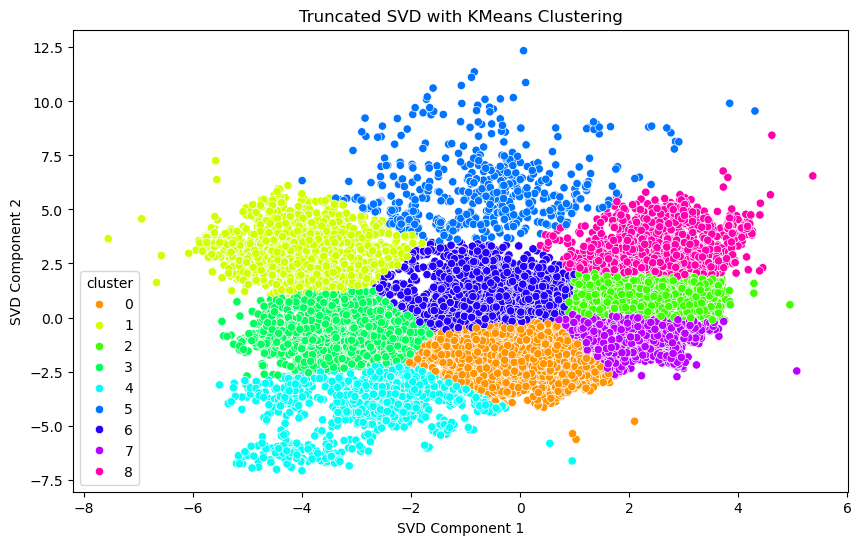

In [17]:
# Apply KMeans clustering
df_svd['cluster'] = kmeans.predict(X_reduced)

# Plot the PCA results with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='svd_component_1', y='svd_component_2',
    hue='cluster', data=df_svd,
    palette=sns.color_palette('hsv', len(df_svd['cluster'].unique())),
    legend='full'
)
plt.title('Truncated SVD with KMeans Clustering')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()
